# Movie reviews

This notebook takes you though a complete iteration of Machine Learning Assignment 1 - Movie reviews. The assignment details (including links to download the data) can be found [here](https://docs.google.com/document/d/1WGYw99e5q6j5V0Zrf2HveagU6URt_kVvdR8B9HYQ99E/edit?usp=sharing). 

In [1]:
# all imports and magic commands
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_measures import BinaryClassificationPerformance
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

### IMPORTANT!!! Make sure you are using `BinaryClassificationPerformance` v1.02

In [25]:
# help(BinaryClassificationPerformance)

# Function for feature building and extraction on natural language data

In [26]:
# function that takes raw data and completes all preprocessing required before model fits
def process_raw_data(fn, my_random_seed, test=False):
    # read and summarize data
    movie_data = pd.read_csv(fn, sep='\t')
    print("movie_data is:", type(movie_data))
    print("movie_data has", movie_data.shape[0], "rows and", movie_data.shape[1], "columns", "\n")
    print("the data types for each of the columns in movie_data:")
    print(movie_data.dtypes, "\n")
    print("the first 10 rows in movie_data:")
    print(movie_data.head(5))
    if (not test):
        print("The rate of 'good' movie reviews in the dataset: ")
        print(movie_data['sentiment'].mean())

    # vectorize Bag of Words from review text; as sparse matrix
    if (not test): # fit_transform()
        hv = HashingVectorizer(n_features=2 ** 17, alternate_sign=False)
        X_hv = hv.fit_transform(movie_data.review)
        fitted_transformations.append(hv)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape)
    else: # transform() 
        X_hv = fitted_transformations[0].transform(movie_data.review)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape) 

    # http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
    if (not test):
        transformer = TfidfTransformer()
        X_tfidf = transformer.fit_transform(X_hv)
        fitted_transformations.append(transformer)
    else:
        X_tfidf = fitted_transformations[1].transform(X_hv)
    
    # create additional quantitative features
    
    # CountVectorizer, modelled on HashingVectorizer above
    from sklearn.feature_extraction.text import CountVectorizer
    if (not test): # fit_transform()
        cv = CountVectorizer(ngram_range=(1, 2))
        X_cv = cv.fit_transform(movie_data.review)
        fitted_transformations.append(cv)
        print("Shape of CountVectorizer X:")
        print(X_cv.shape)
    else: # transform() 
        X_cv = fitted_transformations[0].transform(movie_data.review)
        print("Shape of CountVectorizer X:")
        print(X_cv.shape)
    
    #TfidfTransformer for CountVectorizer, modelled on TfidfTransformer for HashingVectorizer above    
    if (not test):
        transformer_cv = TfidfTransformer()
        X_tfidf = transformer_cv.fit_transform(X_cv)
        fitted_transformations.append(transformer_cv)
    else:
        X_tfidf = fitted_transformations[1].transform(X_cv) 
        
    # features from Amazon.csv to add to feature set
    movie_data['word_count'] = movie_data['review'].str.split(' ').str.len()
    movie_data['punc_count'] = movie_data['review'].str.count("\.")

    X_quant_features = movie_data[["word_count", "punc_count"]]
    print("Look at a few rows of the new quantitative features: ")
    print(X_quant_features.head(10))
    
    # Combine all quantitative features into a single sparse matrix
    X_quant_features_csr = csr_matrix(X_quant_features)
    X_combined = hstack([X_tfidf, X_quant_features_csr])
    X_matrix = csr_matrix(X_combined) # convert to sparse matrix
    print("Size of combined bag of words and new quantitative variables matrix:")
    print(X_matrix.shape)
    
    # Create `X`, scaled matrix of features
    # feature scaling
    if (not test):
        sc = StandardScaler(with_mean=False)
        X = sc.fit_transform(X_matrix)
        fitted_transformations.append(sc)
        print(X.shape)
        y = movie_data['sentiment']
    else:
        X = fitted_transformations[2].transform(X_matrix)
        print(X.shape)
    
    # Create Training and Test Sets
    # enter an integer for the random_state parameter; any integer will work
    if (test):
        X_submission_test = X
        print("Shape of X_test for submission:")
        print(X_submission_test.shape)
        print('SUCCESS!')
        return(movie_data, X_submission_test)
    else: 
        X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = train_test_split(X, y, movie_data, test_size=0.2, random_state=my_random_seed)
        print("Shape of X_train and X_test:")
        print(X_train.shape)
        print(X_test.shape)
        print("Shape of y_train and y_test:")
        print(y_train.shape)
        print(y_test.shape)
        print("Shape of X_raw_train and X_raw_test:")
        print(X_raw_train.shape)
        print(X_raw_test.shape)
        print('SUCCESS!')
        return(X_train, X_test, y_train, y_test, X_raw_train, X_raw_test)

# Create training and test sets from function

In [4]:
# create an empty list to store any use of fit_transform() to transform() later
# it is a global list to store model and feature extraction fits
fitted_transformations = []

# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = process_raw_data(fn='/Users/meeraramesh/Desktop/School/git/ml/final_assignment_1/moviereviews_train.tsv', my_random_seed=13)

print("Number of fits stored in `fitted_transformations` list: ")
print(len(fitted_transformations))

movie_data is: <class 'pandas.core.frame.DataFrame'>
movie_data has 25000 rows and 3 columns 

the data types for each of the columns in movie_data:
id           object
sentiment     int64
review       object
dtype: object 

the first 10 rows in movie_data:
       id  sentiment                                             review
0  5814_8          1  With all this stuff going down at the moment w...
1  2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2  7759_3          0  The film starts with a manager (Nicholas Bell)...
3  3630_4          0  It must be assumed that those who praised this...
4  9495_8          1  Superbly trashy and wondrously unpretentious 8...
The rate of 'good' movie reviews in the dataset: 
0.5
Shape of HashingVectorizer X:
(25000, 131072)
Shape of CountVectorizer X:
(25000, 1513832)
Look at a few rows of the new quantitative features: 
   word_count  punc_count
0         433          20
1         158          16
2         378          20
3      

# Fit (and tune) Various Models

### MODEL: ordinary least squares

In [5]:
from sklearn import linear_model
ols = linear_model.SGDClassifier(loss="squared_loss")
ols.fit(X_train, y_train)

ols_performance_train = BinaryClassificationPerformance(ols.predict(X_train), y_train, 'ols_train')
ols_performance_train.compute_measures()
print(ols_performance_train.performance_measures)

{'Pos': 10002, 'Neg': 9998, 'TP': 2808, 'TN': 7651, 'FP': 2347, 'FN': 7194, 'Accuracy': 0.52295, 'Precision': 0.544713870029098, 'Recall': 0.28074385122975404, 'desc': 'ols_train'}


### MODEL: SVM, linear

In [6]:
from sklearn import linear_model
svm = linear_model.SGDClassifier()
svm.fit(X_train, y_train)

svm_performance_train = BinaryClassificationPerformance(svm.predict(X_train), y_train, 'svm_train')
svm_performance_train.compute_measures()
print(svm_performance_train.performance_measures)

{'Pos': 10002, 'Neg': 9998, 'TP': 10002, 'TN': 9998, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'svm_train'}


### MODEL: logistic regression

In [7]:
from sklearn import linear_model
lgs = linear_model.SGDClassifier(loss='log')
lgs.fit(X_train, y_train)

lgs_performance_train = BinaryClassificationPerformance(lgs.predict(X_train), y_train, 'lgs_train')
lgs_performance_train.compute_measures()
print(lgs_performance_train.performance_measures)

{'Pos': 10002, 'Neg': 9998, 'TP': 10002, 'TN': 9998, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'lgs_train'}


### MODEL: Naive Bayes

In [8]:
from sklearn.naive_bayes import MultinomialNB
nbs = MultinomialNB()
nbs.fit(X_train, y_train)

nbs_performance_train = BinaryClassificationPerformance(nbs.predict(X_train), y_train, 'nbs_train')
nbs_performance_train.compute_measures()
print(nbs_performance_train.performance_measures)

{'Pos': 10002, 'Neg': 9998, 'TP': 10002, 'TN': 9998, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'nbs_train'}


### MODEL: Perceptron

In [9]:
from sklearn import linear_model
prc = linear_model.SGDClassifier(loss='perceptron')
prc.fit(X_train, y_train)

prc_performance_train = BinaryClassificationPerformance(prc.predict(X_train), y_train, 'prc_train')
prc_performance_train.compute_measures()
print(prc_performance_train.performance_measures)

{'Pos': 10002, 'Neg': 9998, 'TP': 10002, 'TN': 9998, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'prc_train'}


### MODEL: Ridge Regression Classifier

original
{'Pos': 10002, 'Neg': 9998, 'TP': 10002, 'TN': 9998, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg_original_train'}
alpha1
{'Pos': 10002, 'Neg': 9998, 'TP': 10002, 'TN': 9998, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg_alpha1_train'}
alpha2
{'Pos': 10002, 'Neg': 9998, 'TP': 10002, 'TN': 9998, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg_alpha2_train'}
alpha3
{'Pos': 10002, 'Neg': 9998, 'TP': 10002, 'TN': 9998, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg_alpha3_train'}
alpha4
{'Pos': 10002, 'Neg': 9998, 'TP': 10002, 'TN': 9998, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg_alpha4_train'}


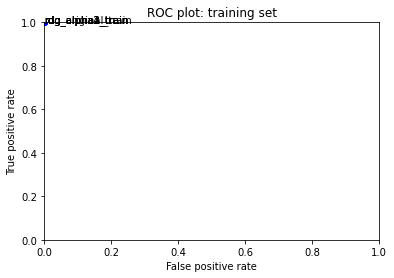

In [10]:
from sklearn import linear_model

rdg_original = linear_model.RidgeClassifier()
rdg_original.fit(X_train, y_train)

rdg_alpha1 = linear_model.RidgeClassifier(alpha=10000)
rdg_alpha1.fit(X_train, y_train)

rdg_alpha2 = linear_model.RidgeClassifier(alpha=50000)
rdg_alpha2.fit(X_train, y_train)

rdg_alpha3 = linear_model.RidgeClassifier(alpha=500000)
rdg_alpha3.fit(X_train, y_train)

rdg_alpha4 = linear_model.RidgeClassifier(alpha=1000000)
rdg_alpha4.fit(X_train, y_train)

rdg_performance_train_original = BinaryClassificationPerformance(rdg_original.predict(X_train), y_train, 'rdg_original_train')
rdg_performance_train_original.compute_measures()
print("original") 
print(rdg_performance_train_original.performance_measures)

rdg_performance_train_alpha1 = BinaryClassificationPerformance(rdg_alpha1.predict(X_train), y_train, 'rdg_alpha1_train')
rdg_performance_train_alpha1.compute_measures()
print("alpha1")
print(rdg_performance_train_alpha1.performance_measures)

rdg_performance_train_alpha2 = BinaryClassificationPerformance(rdg_alpha2.predict(X_train), y_train, 'rdg_alpha2_train')
rdg_performance_train_alpha2.compute_measures()
print("alpha2")
print(rdg_performance_train_alpha2.performance_measures)

rdg_performance_train_alpha3 = BinaryClassificationPerformance(rdg_alpha3.predict(X_train), y_train, 'rdg_alpha3_train')
rdg_performance_train_alpha3.compute_measures()
print("alpha3")
print(rdg_performance_train_alpha3.performance_measures)

rdg_performance_train_alpha4 = BinaryClassificationPerformance(rdg_alpha4.predict(X_train), y_train, 'rdg_alpha4_train')
rdg_performance_train_alpha4.compute_measures()
print("alpha4")
print(rdg_performance_train_alpha4.performance_measures)

#graphs for alpha changes to ridge class on training set data
graphs = [rdg_performance_train_original, rdg_performance_train_alpha1, rdg_performance_train_alpha2, rdg_performance_train_alpha3, rdg_performance_train_alpha4]

for graph in graphs:
    plt.plot(graph.performance_measures['FP'] / graph.performance_measures['Neg'], 
             graph.performance_measures['TP'] / graph.performance_measures['Pos'], 'bo')
    plt.text(graph.performance_measures['FP'] / graph.performance_measures['Neg'], 
             graph.performance_measures['TP'] / graph.performance_measures['Pos'], graph.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: training set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

### MODEL: Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(max_depth=2, random_state=0)
rdf.fit(X_train, y_train)

rdf_performance_train = BinaryClassificationPerformance(rdf.predict(X_train), y_train, 'rdf_train')
rdf_performance_train.compute_measures()
print(rdf_performance_train.performance_measures)

{'Pos': 10002, 'Neg': 9998, 'TP': 7984, 'TN': 7155, 'FP': 2843, 'FN': 2018, 'Accuracy': 0.75695, 'Precision': 0.7374157199593608, 'Recall': 0.7982403519296141, 'desc': 'rdf_train'}


### ROC plot to compare performance of various models and fits

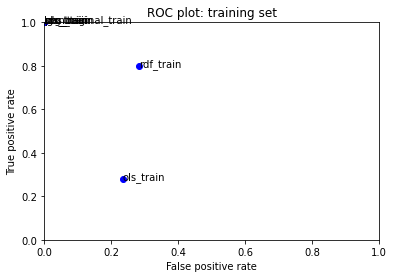

In [12]:
fits = [ols_performance_train, svm_performance_train, lgs_performance_train, nbs_performance_train, prc_performance_train, rdg_performance_train_original, rdf_performance_train]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: training set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

### looking at reviews based on their classification

Let's say we decide that Ordinary Least Squares (OLS) Regression is the best model for generalization. Let's take a look at some of the reviews and try to make a (subjective) determination of whether it's generalizing well. 

In [13]:
# ols_predictions = ols.predict(X_train)

### let's look at some false positives:

In [14]:
# false positives

# print("Examples of false positives:")

# import random, time

# for i in range(0, len(ols_predictions)):
#     if (ols_predictions[i] == 1):
#         if (X_raw_train.iloc[i]['sentiment'] == 0):
#             if (random.uniform(0, 1) < 0.05): # to print only 5% of the false positives
#                 print(i)
#                 print(X_raw_train.iloc[i]['review'])
#                 print('* * * * * * * * * ')


---

# <span style="color:red">WARNING: Don't look at test set performance too much!</span>

---

The following cells show performance on your test set. Do not look at this too often! 

# Look at performance on the test set

### MODEL: ordinary least squares

In [15]:
ols_performance_test = BinaryClassificationPerformance(ols.predict(X_test), y_test, 'ols_test')
ols_performance_test.compute_measures()
print(ols_performance_test.performance_measures)

{'Pos': 2498, 'Neg': 2502, 'TP': 649, 'TN': 1925, 'FP': 577, 'FN': 1849, 'Accuracy': 0.5148, 'Precision': 0.5293637846655791, 'Recall': 0.25980784627702164, 'desc': 'ols_test'}


### MODEL: SVM, linear

In [16]:
svm_performance_test = BinaryClassificationPerformance(svm.predict(X_test), y_test, 'svm_test')
svm_performance_test.compute_measures()
print(svm_performance_test.performance_measures)

{'Pos': 2498, 'Neg': 2502, 'TP': 2134, 'TN': 2119, 'FP': 383, 'FN': 364, 'Accuracy': 0.8506, 'Precision': 0.8478347238776321, 'Recall': 0.8542834267413931, 'desc': 'svm_test'}


### MODEL: logistic regression

In [17]:
lgs_performance_test = BinaryClassificationPerformance(lgs.predict(X_test), y_test, 'lgs_test')
lgs_performance_test.compute_measures()
print(lgs_performance_test.performance_measures)

{'Pos': 2498, 'Neg': 2502, 'TP': 2111, 'TN': 2109, 'FP': 393, 'FN': 387, 'Accuracy': 0.844, 'Precision': 0.8430511182108626, 'Recall': 0.8450760608486789, 'desc': 'lgs_test'}


### MODEL: Naive Bayes

In [18]:
nbs_performance_test = BinaryClassificationPerformance(nbs.predict(X_test), y_test, 'nbs_test')
nbs_performance_test.compute_measures()
print(nbs_performance_test.performance_measures)

{'Pos': 2498, 'Neg': 2502, 'TP': 1997, 'TN': 2147, 'FP': 355, 'FN': 501, 'Accuracy': 0.8288, 'Precision': 0.8490646258503401, 'Recall': 0.7994395516413131, 'desc': 'nbs_test'}


### MODEL: Perceptron

In [19]:
prc_performance_test = BinaryClassificationPerformance(prc.predict(X_test), y_test, 'prc_test')
prc_performance_test.compute_measures()
print(prc_performance_test.performance_measures)

{'Pos': 2498, 'Neg': 2502, 'TP': 2123, 'TN': 2122, 'FP': 380, 'FN': 375, 'Accuracy': 0.849, 'Precision': 0.8481821813823411, 'Recall': 0.8498799039231385, 'desc': 'prc_test'}


### MODEL: Ridge Regression Classifier

original
{'Pos': 2498, 'Neg': 2502, 'TP': 2301, 'TN': 2212, 'FP': 290, 'FN': 197, 'Accuracy': 0.9026, 'Precision': 0.8880741026630644, 'Recall': 0.9211369095276221, 'desc': 'rdg_original_test'}
alpha1
{'Pos': 2498, 'Neg': 2502, 'TP': 2300, 'TN': 2211, 'FP': 291, 'FN': 198, 'Accuracy': 0.9022, 'Precision': 0.8876881512929371, 'Recall': 0.9207365892714171, 'desc': 'rdg_alpha1_test'}
alpha2
{'Pos': 2498, 'Neg': 2502, 'TP': 2294, 'TN': 2215, 'FP': 287, 'FN': 204, 'Accuracy': 0.9018, 'Precision': 0.8888027896164278, 'Recall': 0.9183346677341874, 'desc': 'rdg_alpha2_test'}
alpha3
{'Pos': 2498, 'Neg': 2502, 'TP': 2275, 'TN': 2242, 'FP': 260, 'FN': 223, 'Accuracy': 0.9034, 'Precision': 0.8974358974358975, 'Recall': 0.910728582866293, 'desc': 'rdg_alpha3_test'}
alpha4
{'Pos': 2498, 'Neg': 2502, 'TP': 2261, 'TN': 2248, 'FP': 254, 'FN': 237, 'Accuracy': 0.9018, 'Precision': 0.8990059642147117, 'Recall': 0.9051240992794235, 'desc': 'rdg_alpha4_test'}


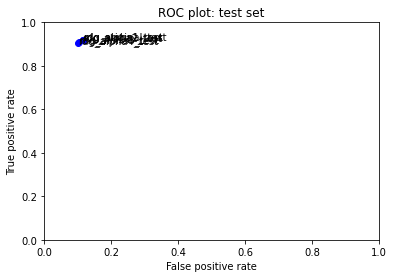

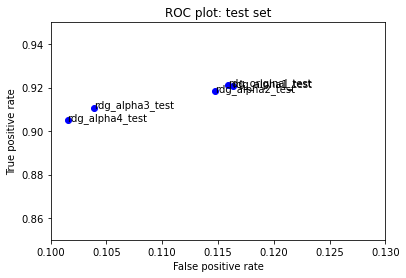

In [20]:
rdg_performance_test_original = BinaryClassificationPerformance(rdg_original.predict(X_test), y_test, 'rdg_original_test')
rdg_performance_test_original.compute_measures()
print("original")
print(rdg_performance_test_original.performance_measures)

rdg_performance_test_alpha1 = BinaryClassificationPerformance(rdg_alpha1.predict(X_test), y_test, 'rdg_alpha1_test')
rdg_performance_test_alpha1.compute_measures()
print("alpha1")
print(rdg_performance_test_alpha1.performance_measures)

rdg_performance_test_alpha2 = BinaryClassificationPerformance(rdg_alpha2.predict(X_test), y_test, 'rdg_alpha2_test')
rdg_performance_test_alpha2.compute_measures()
print("alpha2")
print(rdg_performance_test_alpha2.performance_measures)

rdg_performance_test_alpha3 = BinaryClassificationPerformance(rdg_alpha3.predict(X_test), y_test, 'rdg_alpha3_test')
rdg_performance_test_alpha3.compute_measures()
print("alpha3")
print(rdg_performance_test_alpha3.performance_measures)

rdg_performance_test_alpha4 = BinaryClassificationPerformance(rdg_alpha4.predict(X_test), y_test, 'rdg_alpha4_test')
rdg_performance_test_alpha4.compute_measures()
print("alpha4")
print(rdg_performance_test_alpha4.performance_measures)

# graphs for alpha changes to ridge class on test set data
graphs = [rdg_performance_test_original, rdg_performance_test_alpha1, rdg_performance_test_alpha2, rdg_performance_test_alpha3, rdg_performance_test_alpha4]

for graph in graphs:
    plt.plot(graph.performance_measures['FP'] / graph.performance_measures['Neg'], 
             graph.performance_measures['TP'] / graph.performance_measures['Pos'], 'bo')
    plt.text(graph.performance_measures['FP'] / graph.performance_measures['Neg'], 
             graph.performance_measures['TP'] / graph.performance_measures['Pos'], graph.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

for graph in graphs:
    plt.plot(graph.performance_measures['FP'] / graph.performance_measures['Neg'], 
             graph.performance_measures['TP'] / graph.performance_measures['Pos'], 'bo')
    plt.text(graph.performance_measures['FP'] / graph.performance_measures['Neg'], 
             graph.performance_measures['TP'] / graph.performance_measures['Pos'], graph.desc)
plt.axis([.1, .13, .85, .95])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

### MODEL: Random Forest Classifier

In [21]:
rdf_performance_test = BinaryClassificationPerformance(rdf.predict(X_test), y_test, 'rdf_test')
rdf_performance_test.compute_measures()
print(rdf_performance_test.performance_measures)

{'Pos': 2498, 'Neg': 2502, 'TP': 1958, 'TN': 1758, 'FP': 744, 'FN': 540, 'Accuracy': 0.7432, 'Precision': 0.7246484085862325, 'Recall': 0.7838270616493195, 'desc': 'rdf_test'}


### ROC plot to compare performance of various models and fits

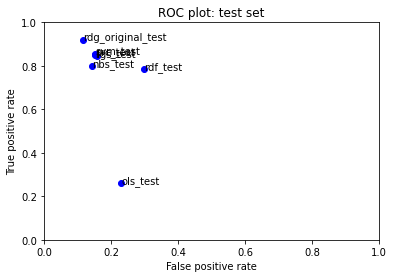

In [22]:
fits = [ols_performance_test, svm_performance_test, lgs_performance_test, nbs_performance_test, prc_performance_test, rdg_performance_test_original, rdf_performance_test]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

---

# <span style="color:red">SUBMISSION</span>

---

In [23]:
# read in test data for submission
# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
raw_data, X_test_submission = process_raw_data(fn='/Users/meeraramesh/Desktop/School/git/ml/final_assignment_1/moviereviews_train.tsv', my_random_seed=13, test=True)
print("Number of rows in the submission test set (should be 25,000): ")

movie_data is: <class 'pandas.core.frame.DataFrame'>
movie_data has 25000 rows and 3 columns 

the data types for each of the columns in movie_data:
id           object
sentiment     int64
review       object
dtype: object 

the first 10 rows in movie_data:
       id  sentiment                                             review
0  5814_8          1  With all this stuff going down at the moment w...
1  2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2  7759_3          0  The film starts with a manager (Nicholas Bell)...
3  3630_4          0  It must be assumed that those who praised this...
4  9495_8          1  Superbly trashy and wondrously unpretentious 8...
Shape of HashingVectorizer X:
(25000, 131072)
Shape of CountVectorizer X:
(25000, 131072)
Look at a few rows of the new quantitative features: 
   word_count  punc_count
0         433          20
1         158          16
2         378          20
3         379           8
4         367           9
5         

AttributeError: lower not found

---

Choose a <span style="color:red">*single*</span> model for your submission. In this code, I am choosing the Ordinary Least Squares model fit, which is in the `ols` object. But you should choose the model that is performing the best for you! 

In [ ]:
# store the id from the raw data
my_submission = pd.DataFrame(raw_data["id"])
# concatenate predictions to the id
my_submission["prediction"] = rdg_alpha3.predict(X_test_submission)
# look at the proportion of positive predictions
print(my_submission['prediction'].mean())

In [ ]:
raw_data.head()

In [ ]:
my_submission.head()

In [ ]:
my_submission.shape

In [ ]:
# export submission file as pdf
# CHANGE FILE PATH: 
my_submission.to_csv('/home/ec2-user/data/moviereviews_submission.csv', index=False)

# Submit to Canvas: 1) the CSV file that was written in the previous cell and 2) the url to the repository (GitHub or other) that contains your code and documentation